In [1]:
import time

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np

import os, sys

from preprocessing import *

import keras

from keras.layers import Dense, LeakyReLU

Using TensorFlow backend.


In [29]:
ROOT_DIR = 'training/'
IMAGE_DIR = ROOT_DIR + 'images/'
GT_DIR = ROOT_DIR + 'groundtruth/'

PATCH_SIZE = 10

WINDOW_SIZE = 3

In [30]:
files = os.listdir(IMAGE_DIR)

imgs = np.stack([load_image(IMAGE_DIR + file) for file in files]) # images (400, 400, 3)
gt_imgs = np.stack([load_image(GT_DIR + file) for file in files]) # images (400, 400)

patched_imgs = np.stack([patch_image(img, PATCH_SIZE) for img in imgs]) # images (400, 400)
patched_gts = np.stack([patch_groundtruth(gt, PATCH_SIZE) for gt in gt_imgs])

In [31]:
PATCHED_SIZE = imgs.shape[1] // PATCH_SIZE
WINDOWS_PER_IMAGE = PATCHED_SIZE ** 2

In [32]:
N = 1 # Number of image to be used in training

leakyness = 0.1

In [33]:
matrix_chunks = [image_to_features(im, WINDOW_SIZE, True) for im in patched_imgs[:N]]
matrix = np.vstack(matrix_chunks)

labels = np.ravel(patched_gts[:N])
assert labels.shape[0] == matrix.shape[0]

In [34]:
#labels = keras.utils.np_utils.to_categorical(window_labels)

In [49]:
mlp = keras.models.Sequential([
    Dense(12, input_shape=(matrix.shape[1],), activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [50]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                336       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________


In [51]:
mlp.compile(loss=keras.losses.mean_squared_error,
            optimizer=keras.optimizers.Adam(lr=0.01),
            metrics=['accuracy'])

In [52]:
start = time.perf_counter()

mlp.fit(matrix, labels, epochs=1000)#, batch_size=matrix.shape[0])

time.perf_counter() - start

Epoch 1/1000
1600/1600 [==============================] - 0s - loss: 0.1698 - acc: 0.7881      
Epoch 2/1000
1600/1600 [==============================] - 0s - loss: 0.1668 - acc: 0.7881     
Epoch 3/1000
1600/1600 [==============================] - 0s - loss: 0.1663 - acc: 0.7881     
Epoch 4/1000
1600/1600 [==============================] - 0s - loss: 0.1662 - acc: 0.7881     
Epoch 5/1000
1600/1600 [==============================] - 0s - loss: 0.1664 - acc: 0.7881     
Epoch 6/1000
1600/1600 [==============================] - 0s - loss: 0.1664 - acc: 0.7881     
Epoch 7/1000
1600/1600 [==============================] - 0s - loss: 0.1660 - acc: 0.7881     
Epoch 8/1000
1600/1600 [==============================] - 0s - loss: 0.1657 - acc: 0.7881     
Epoch 9/1000
1600/1600 [==============================] - 0s - loss: 0.1654 - acc: 0.7881     
Epoch 10/1000
1600/1600 [==============================] - 0s - loss: 0.1668 - acc: 0.7881     
Epoch 11/1000
1600/1600 [=======================

1600/1600 [==============================] - 0s - loss: 0.1459 - acc: 0.7831     
Epoch 87/1000
1600/1600 [==============================] - 0s - loss: 0.1469 - acc: 0.7875     
Epoch 88/1000
1600/1600 [==============================] - 0s - loss: 0.1457 - acc: 0.7844     
Epoch 89/1000
1600/1600 [==============================] - 0s - loss: 0.1454 - acc: 0.7863     
Epoch 90/1000
1600/1600 [==============================] - 0s - loss: 0.1453 - acc: 0.7850     
Epoch 91/1000
1600/1600 [==============================] - 0s - loss: 0.1475 - acc: 0.7831     
Epoch 92/1000
1600/1600 [==============================] - 0s - loss: 0.1463 - acc: 0.7794     
Epoch 93/1000
1600/1600 [==============================] - 0s - loss: 0.1456 - acc: 0.7831     
Epoch 94/1000
1600/1600 [==============================] - 0s - loss: 0.1492 - acc: 0.7831     
Epoch 95/1000
1600/1600 [==============================] - 0s - loss: 0.1470 - acc: 0.7863     
Epoch 96/1000
1600/1600 [=============================

1600/1600 [==============================] - 0s - loss: 0.1409 - acc: 0.7869     
Epoch 171/1000
1600/1600 [==============================] - 0s - loss: 0.1417 - acc: 0.7837     
Epoch 172/1000
1600/1600 [==============================] - 0s - loss: 0.1422 - acc: 0.7913     
Epoch 173/1000
1600/1600 [==============================] - 0s - loss: 0.1418 - acc: 0.7856     
Epoch 174/1000
1600/1600 [==============================] - 0s - loss: 0.1414 - acc: 0.7850     
Epoch 175/1000
1600/1600 [==============================] - 0s - loss: 0.1435 - acc: 0.7812     
Epoch 176/1000
1600/1600 [==============================] - 0s - loss: 0.1439 - acc: 0.7831     
Epoch 177/1000
1600/1600 [==============================] - 0s - loss: 0.1411 - acc: 0.7856     
Epoch 178/1000
1600/1600 [==============================] - 0s - loss: 0.1420 - acc: 0.7906     
Epoch 179/1000
1600/1600 [==============================] - 0s - loss: 0.1417 - acc: 0.7919     
Epoch 180/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1388 - acc: 0.7831     
Epoch 255/1000
1600/1600 [==============================] - 0s - loss: 0.1379 - acc: 0.7969     
Epoch 256/1000
1600/1600 [==============================] - 0s - loss: 0.1383 - acc: 0.7869     
Epoch 257/1000
1600/1600 [==============================] - 0s - loss: 0.1391 - acc: 0.7913     
Epoch 258/1000
1600/1600 [==============================] - 0s - loss: 0.1374 - acc: 0.7900     
Epoch 259/1000
1600/1600 [==============================] - 0s - loss: 0.1378 - acc: 0.7887     
Epoch 260/1000
1600/1600 [==============================] - 0s - loss: 0.1369 - acc: 0.7913     
Epoch 261/1000
1600/1600 [==============================] - 0s - loss: 0.1366 - acc: 0.7919     
Epoch 262/1000
1600/1600 [==============================] - 0s - loss: 0.1379 - acc: 0.7906     
Epoch 263/1000
1600/1600 [==============================] - 0s - loss: 0.1363 - acc: 0.7956     
Epoch 264/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1318 - acc: 0.8037     
Epoch 339/1000
1600/1600 [==============================] - 0s - loss: 0.1315 - acc: 0.8000     
Epoch 340/1000
1600/1600 [==============================] - 0s - loss: 0.1318 - acc: 0.8000     
Epoch 341/1000
1600/1600 [==============================] - 0s - loss: 0.1309 - acc: 0.7944     
Epoch 342/1000
1600/1600 [==============================] - 0s - loss: 0.1327 - acc: 0.8044     
Epoch 343/1000
1600/1600 [==============================] - 0s - loss: 0.1317 - acc: 0.8025     
Epoch 344/1000
1600/1600 [==============================] - 0s - loss: 0.1313 - acc: 0.8056     
Epoch 345/1000
1600/1600 [==============================] - 0s - loss: 0.1311 - acc: 0.8081     
Epoch 346/1000
1600/1600 [==============================] - 0s - loss: 0.1309 - acc: 0.7913     
Epoch 347/1000
1600/1600 [==============================] - 0s - loss: 0.1326 - acc: 0.7994     
Epoch 348/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1275 - acc: 0.8031     
Epoch 423/1000
1600/1600 [==============================] - 0s - loss: 0.1258 - acc: 0.8119     
Epoch 424/1000
1600/1600 [==============================] - 0s - loss: 0.1262 - acc: 0.8063     
Epoch 425/1000
1600/1600 [==============================] - 0s - loss: 0.1277 - acc: 0.8044     
Epoch 426/1000
1600/1600 [==============================] - 0s - loss: 0.1267 - acc: 0.8056     
Epoch 427/1000
1600/1600 [==============================] - 0s - loss: 0.1255 - acc: 0.8081     
Epoch 428/1000
1600/1600 [==============================] - 0s - loss: 0.1263 - acc: 0.8056     
Epoch 429/1000
1600/1600 [==============================] - 0s - loss: 0.1260 - acc: 0.8081     
Epoch 430/1000
1600/1600 [==============================] - 0s - loss: 0.1256 - acc: 0.8094     
Epoch 431/1000
1600/1600 [==============================] - 0s - loss: 0.1250 - acc: 0.8069     
Epoch 432/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1220 - acc: 0.8137     
Epoch 507/1000
1600/1600 [==============================] - 0s - loss: 0.1225 - acc: 0.8119     
Epoch 508/1000
1600/1600 [==============================] - 0s - loss: 0.1218 - acc: 0.8219     
Epoch 509/1000
1600/1600 [==============================] - 0s - loss: 0.1239 - acc: 0.8169     
Epoch 510/1000
1600/1600 [==============================] - 0s - loss: 0.1241 - acc: 0.8100     
Epoch 511/1000
1600/1600 [==============================] - 0s - loss: 0.1229 - acc: 0.8125     
Epoch 512/1000
1600/1600 [==============================] - 0s - loss: 0.1239 - acc: 0.8106     
Epoch 513/1000
1600/1600 [==============================] - 0s - loss: 0.1223 - acc: 0.8156     
Epoch 514/1000
1600/1600 [==============================] - 0s - loss: 0.1245 - acc: 0.8181     
Epoch 515/1000
1600/1600 [==============================] - 0s - loss: 0.1228 - acc: 0.8119     
Epoch 516/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1179 - acc: 0.8206     
Epoch 591/1000
1600/1600 [==============================] - 0s - loss: 0.1222 - acc: 0.8169     
Epoch 592/1000
1600/1600 [==============================] - 0s - loss: 0.1187 - acc: 0.8219     
Epoch 593/1000
1600/1600 [==============================] - 0s - loss: 0.1189 - acc: 0.8225     
Epoch 594/1000
1600/1600 [==============================] - 0s - loss: 0.1191 - acc: 0.8181     
Epoch 595/1000
1600/1600 [==============================] - 0s - loss: 0.1188 - acc: 0.8225     
Epoch 596/1000
1600/1600 [==============================] - 0s - loss: 0.1182 - acc: 0.8256     
Epoch 597/1000
1600/1600 [==============================] - 0s - loss: 0.1185 - acc: 0.8206     
Epoch 598/1000
1600/1600 [==============================] - 0s - loss: 0.1184 - acc: 0.8219     
Epoch 599/1000
1600/1600 [==============================] - 0s - loss: 0.1179 - acc: 0.8200     
Epoch 600/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1161 - acc: 0.8250     
Epoch 675/1000
1600/1600 [==============================] - 0s - loss: 0.1163 - acc: 0.8312     
Epoch 676/1000
1600/1600 [==============================] - 0s - loss: 0.1163 - acc: 0.8269     
Epoch 677/1000
1600/1600 [==============================] - 0s - loss: 0.1156 - acc: 0.8312     
Epoch 678/1000
1600/1600 [==============================] - 0s - loss: 0.1145 - acc: 0.8294     
Epoch 679/1000
1600/1600 [==============================] - 0s - loss: 0.1160 - acc: 0.8337     
Epoch 680/1000
1600/1600 [==============================] - 0s - loss: 0.1156 - acc: 0.8312     
Epoch 681/1000
1600/1600 [==============================] - 0s - loss: 0.1166 - acc: 0.8200     
Epoch 682/1000
1600/1600 [==============================] - 0s - loss: 0.1169 - acc: 0.8263     
Epoch 683/1000
1600/1600 [==============================] - 0s - loss: 0.1163 - acc: 0.8256     
Epoch 684/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1130 - acc: 0.8394     
Epoch 759/1000
1600/1600 [==============================] - 0s - loss: 0.1128 - acc: 0.8331     
Epoch 760/1000
1600/1600 [==============================] - 0s - loss: 0.1118 - acc: 0.8394     
Epoch 761/1000
1600/1600 [==============================] - 0s - loss: 0.1121 - acc: 0.8400     
Epoch 762/1000
1600/1600 [==============================] - 0s - loss: 0.1118 - acc: 0.8375     
Epoch 763/1000
1600/1600 [==============================] - 0s - loss: 0.1124 - acc: 0.8381     
Epoch 764/1000
1600/1600 [==============================] - 0s - loss: 0.1117 - acc: 0.8400     
Epoch 765/1000
1600/1600 [==============================] - 0s - loss: 0.1124 - acc: 0.8444     
Epoch 766/1000
1600/1600 [==============================] - 0s - loss: 0.1134 - acc: 0.8381     
Epoch 767/1000
1600/1600 [==============================] - 0s - loss: 0.1124 - acc: 0.8350     
Epoch 768/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1113 - acc: 0.8419     
Epoch 843/1000
1600/1600 [==============================] - 0s - loss: 0.1088 - acc: 0.8469     
Epoch 844/1000
1600/1600 [==============================] - 0s - loss: 0.1096 - acc: 0.8431     
Epoch 845/1000
1600/1600 [==============================] - 0s - loss: 0.1138 - acc: 0.8294     
Epoch 846/1000
1600/1600 [==============================] - 0s - loss: 0.1104 - acc: 0.8425     
Epoch 847/1000
1600/1600 [==============================] - 0s - loss: 0.1079 - acc: 0.8400     
Epoch 848/1000
1600/1600 [==============================] - 0s - loss: 0.1123 - acc: 0.8287     
Epoch 849/1000
1600/1600 [==============================] - 0s - loss: 0.1100 - acc: 0.8406     
Epoch 850/1000
1600/1600 [==============================] - 0s - loss: 0.1079 - acc: 0.8469     
Epoch 851/1000
1600/1600 [==============================] - 0s - loss: 0.1122 - acc: 0.8356     
Epoch 852/1000
1600/1600 [===================

1600/1600 [==============================] - 0s - loss: 0.1058 - acc: 0.8462     
Epoch 927/1000
1600/1600 [==============================] - 0s - loss: 0.1071 - acc: 0.8431     
Epoch 928/1000
1600/1600 [==============================] - 0s - loss: 0.1058 - acc: 0.8450     
Epoch 929/1000
1600/1600 [==============================] - 0s - loss: 0.1078 - acc: 0.8394     
Epoch 930/1000
1600/1600 [==============================] - 0s - loss: 0.1044 - acc: 0.8506     
Epoch 931/1000
1600/1600 [==============================] - 0s - loss: 0.1063 - acc: 0.8419     
Epoch 932/1000
1600/1600 [==============================] - 0s - loss: 0.1061 - acc: 0.8444     
Epoch 933/1000
1600/1600 [==============================] - 0s - loss: 0.1051 - acc: 0.8450     
Epoch 934/1000
1600/1600 [==============================] - 0s - loss: 0.1047 - acc: 0.8406     
Epoch 935/1000
1600/1600 [==============================] - 0s - loss: 0.1047 - acc: 0.8481     
Epoch 936/1000
1600/1600 [===================

47.079661720999866

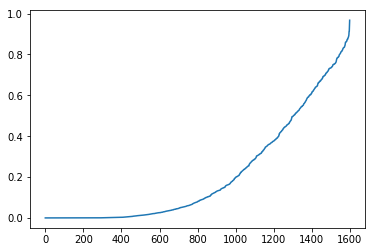

In [65]:
i = 0
window_t = image_to_features(patched_imgs[i], WINDOW_SIZE, True)
preds = mlp.predict(window_t)
plt.plot(np.sort(np.ravel(preds)))
preds[preds >= 0.5] = 1
preds[preds < 0.5] = 0
f = preds
f = np.reshape(f, (PATCHED_SIZE, PATCHED_SIZE))

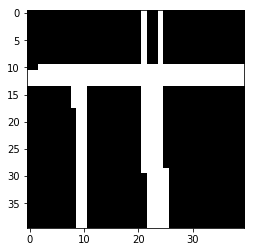

In [66]:
plt.imshow(patched_gts[i], cmap='Greys_r')

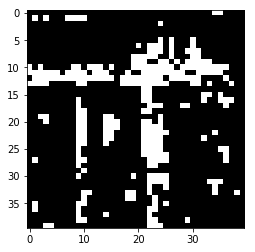

In [67]:
plt.imshow(f, cmap='Greys_r')

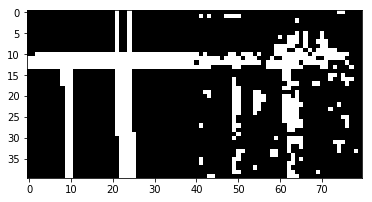

In [68]:
plt.imshow(np.hstack([patched_gts[i], f]), cmap='Greys_r')